In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
pd.set_option('display.max_columns', None)

In [2]:
plt.rcParams['font.family'] = 'Nunito'
plt.rcParams['font.size'] = 10

# color_code = ['#80ADF7','#EFBA50']
font_name = 'Nunito'
font_size = 10
font_size_title = 12
font_weight = 'bold'
orange_color = '#EFBA50'
blue_color = '#80ADF7'
grey_color = '#B0BCC8'
green_color = '#9EEDE0'
darkgreen_color = '#3CDBC0'
red_color = '#FD7284'
brown_color = '#D8B475'
lightred_color = '#FF9592'
# color_code2 = [blue_color, grey_color]

background_color = "#F1F1F1"
border_color = "#B0BCC8"
text_align = 'center'
border_width ="0.5px"
border_style = 'solid'

body_design = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align}
body_design2 = {'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'70px'}
body_design3 = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'120px'}

border_design = {'selector': 'th', 'props': [('background-color' , background_color),('border-style' ,border_style),('font-family',font_name),('font-size',font_size),('border-width',border_width),('text-align',text_align),('border-color',border_color)]}
bar_width=0.5

In [3]:
%run path_changer.py

In [4]:
scenario_1_df = pd.read_csv(file_path + 'scenario_1_df.csv',low_memory=False)
scenario_1_df = scenario_1_df[scenario_1_df['trackrx_last_status'] == 'B']

scenario_2_df = pd.read_csv(file_path + 'scenario_2_df.csv',low_memory=False)
scenario_2_df = scenario_2_df[scenario_2_df['trackrx_last_status'] == 'B']


scenario_3_df = pd.read_csv(file_path + 'scenario_3_df.csv',low_memory=False)
scenario_3_df = scenario_3_df[scenario_3_df['trackrx_last_status'] == 'B']


scenario_4_df = pd.read_csv(file_path + 'scenario_4_df.csv',low_memory=False)
scenario_4_df = scenario_4_df[scenario_4_df['trackrx_last_status'] == 'B']

In [5]:
'rx_revenue' in scenario_1_df.columns

False

In [6]:
scenario_1_df['TOTALRXAMOUNT'] = scenario_1_df['TOTALRXAMOUNT'].astype(str)
scenario_2_df['TOTALRXAMOUNT'] = scenario_2_df['TOTALRXAMOUNT'].astype(str)
scenario_3_df['TOTALRXAMOUNT'] = scenario_3_df['TOTALRXAMOUNT'].astype(str)
scenario_4_df['TOTALRXAMOUNT'] = scenario_4_df['TOTALRXAMOUNT'].astype(str)

In [7]:
scenario_1_df['rx_revenue'] = scenario_1_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_2_df['rx_revenue'] = scenario_2_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_3_df['rx_revenue'] = scenario_3_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)
scenario_4_df['rx_revenue'] = scenario_4_df['TOTALRXAMOUNT'].apply(lambda x: x.replace(',','')).astype(float)

In [8]:
scenario_1_df_tile = pd.pivot_table(scenario_1_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_2_df_tile = pd.pivot_table(scenario_2_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_3_df_tile = pd.pivot_table(scenario_3_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()
scenario_4_df_tile = pd.pivot_table(scenario_4_df,index=['pharmacy_loc'],values=['rx_revenue','rx_code_key_location'],aggfunc={'rx_revenue':np.sum,'rx_code_key_location':'count'}).reset_index()

scenario_1_df_tile = scenario_1_df_tile.append(scenario_1_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_2_df_tile = scenario_2_df_tile.append(scenario_2_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_3_df_tile = scenario_3_df_tile.append(scenario_3_df_tile.sum(numeric_only=True), ignore_index=True)
scenario_4_df_tile = scenario_4_df_tile.append(scenario_4_df_tile.sum(numeric_only=True), ignore_index=True)

scenario_1_df_tile['Rev/Rx'] = round(scenario_1_df_tile['rx_revenue']/scenario_1_df_tile['rx_code_key_location'],0)
scenario_2_df_tile['Rev/Rx'] = round(scenario_2_df_tile['rx_revenue']/scenario_2_df_tile['rx_code_key_location'],0)
scenario_3_df_tile['Rev/Rx'] = round(scenario_3_df_tile['rx_revenue']/scenario_3_df_tile['rx_code_key_location'],0)
scenario_4_df_tile['Rev/Rx'] = round(scenario_4_df_tile['rx_revenue']/scenario_4_df_tile['rx_code_key_location'],0)


In [9]:
scenario_1_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_2_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_3_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_4_df_tile['pharmacy_loc'].replace({np.nan:'Total'},inplace=True)
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location,rx_revenue,Rev/Rx
0,FL-MI,150.0,75635.14,504.0
1,MD-BA,122.0,62418.40,512.0
2,NC-RA,354.0,39559.11,112.0
3,NJ-SO,1589.0,489964.43,308.0
4,NY-BK,2274.0,577560.62,254.0
5,NY-MA,222.0,14157.26,64.0
6,PA-PH,1583.0,314095.14,198.0
7,Total,6294.0,1573390.10,250.0


In [10]:
scenario_1_df_tile.columns = ['pharmacy_loc','rx_code_key_location_1','rx_revenue_1','Rev/Rx_1']
scenario_2_df_tile.columns = ['pharmacy_loc','rx_code_key_location_2','rx_revenue_2','Rev/Rx_2']
scenario_3_df_tile.columns = ['pharmacy_loc','rx_code_key_location_3','rx_revenue_3','Rev/Rx_3']
scenario_4_df_tile.columns = ['pharmacy_loc','rx_code_key_location_4','rx_revenue_4','Rev/Rx_4']
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,150.0,75635.14,504.0
1,MD-BA,122.0,62418.40,512.0
2,NC-RA,354.0,39559.11,112.0
3,NJ-SO,1589.0,489964.43,308.0
4,NY-BK,2274.0,577560.62,254.0
5,NY-MA,222.0,14157.26,64.0
6,PA-PH,1583.0,314095.14,198.0
7,Total,6294.0,1573390.10,250.0


In [11]:
# 222964.38/6

In [12]:
scenario_1_df_tile[['rx_code_key_location_1','rx_revenue_1']] = scenario_1_df_tile[['rx_code_key_location_1','rx_revenue_1']].div(6)
scenario_2_df_tile[['rx_code_key_location_2','rx_revenue_2']] = scenario_2_df_tile[['rx_code_key_location_2','rx_revenue_2']].div(6)
scenario_3_df_tile[['rx_code_key_location_3','rx_revenue_3']] = scenario_3_df_tile[['rx_code_key_location_3','rx_revenue_3']].div(6)
scenario_4_df_tile[['rx_code_key_location_4','rx_revenue_4']] = scenario_4_df_tile[['rx_code_key_location_4','rx_revenue_4']].div(6)
scenario_4_df_tile

,pharmacy_loc,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,25.000000,12605.856667,504.0
1,MD-BA,20.333333,10403.066667,512.0
2,NC-RA,59.000000,6593.185000,112.0
3,NJ-SO,264.833333,81660.738333,308.0
4,NY-BK,379.000000,96260.103333,254.0
5,NY-MA,37.000000,2359.543333,64.0
6,PA-PH,263.833333,52349.190000,198.0
7,Total,1049.000000,262231.683333,250.0


In [13]:
final_df = pd.merge(scenario_1_df_tile,scenario_2_df_tile,how='outer',on='pharmacy_loc').merge(scenario_3_df_tile,how='outer',on='pharmacy_loc').merge(scenario_4_df_tile,how='outer',on='pharmacy_loc')

In [14]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,4497.833333,5.560636e+05,124.0,75.333333,1.091299e+05,1449.0,5.333333,8407.386667,1576.0,25.000000,12605.856667,504.0
1,MD-BA,1388.833333,9.577100e+05,690.0,119.833333,2.270214e+05,1894.0,7.500000,15172.458333,2023.0,20.333333,10403.066667,512.0
2,NC-RA,1334.500000,4.320531e+05,324.0,78.500000,1.562970e+05,1991.0,4.666667,5138.943333,1101.0,59.000000,6593.185000,112.0
3,NJ-SO,7578.000000,3.377214e+06,446.0,399.000000,5.740792e+05,1439.0,86.333333,143927.311667,1667.0,264.833333,81660.738333,308.0
4,NY-BK,14806.000000,5.469904e+06,369.0,460.666667,5.715193e+05,1241.0,71.000000,72406.711667,1020.0,379.000000,96260.103333,254.0
5,NY-MA,3090.666667,2.418699e+05,78.0,45.666667,1.694068e+04,371.0,4.166667,988.526667,237.0,37.000000,2359.543333,64.0
6,PA-PH,3143.166667,1.488030e+06,473.0,141.833333,2.793086e+05,1969.0,38.000000,36037.968333,948.0,263.833333,52349.190000,198.0
7,Total,35839.000000,1.252284e+07,349.0,1320.833333,1.934296e+06,1464.0,217.000000,282079.306667,1300.0,1049.000000,262231.683333,250.0


In [15]:
# for i in final_df.iloc[:,1:].columns:
#     final_df[i] = final_df[i].div(6)
#     #print(final_df[i].div(6))

In [16]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,4497.833333,5.560636e+05,124.0,75.333333,1.091299e+05,1449.0,5.333333,8407.386667,1576.0,25.000000,12605.856667,504.0
1,MD-BA,1388.833333,9.577100e+05,690.0,119.833333,2.270214e+05,1894.0,7.500000,15172.458333,2023.0,20.333333,10403.066667,512.0
2,NC-RA,1334.500000,4.320531e+05,324.0,78.500000,1.562970e+05,1991.0,4.666667,5138.943333,1101.0,59.000000,6593.185000,112.0
3,NJ-SO,7578.000000,3.377214e+06,446.0,399.000000,5.740792e+05,1439.0,86.333333,143927.311667,1667.0,264.833333,81660.738333,308.0
4,NY-BK,14806.000000,5.469904e+06,369.0,460.666667,5.715193e+05,1241.0,71.000000,72406.711667,1020.0,379.000000,96260.103333,254.0
5,NY-MA,3090.666667,2.418699e+05,78.0,45.666667,1.694068e+04,371.0,4.166667,988.526667,237.0,37.000000,2359.543333,64.0
6,PA-PH,3143.166667,1.488030e+06,473.0,141.833333,2.793086e+05,1969.0,38.000000,36037.968333,948.0,263.833333,52349.190000,198.0
7,Total,35839.000000,1.252284e+07,349.0,1320.833333,1.934296e+06,1464.0,217.000000,282079.306667,1300.0,1049.000000,262231.683333,250.0


In [17]:
final_df.isnull().sum()

pharmacy_loc              0
rx_code_key_location_1    0
rx_revenue_1              0
Rev/Rx_1                  0
rx_code_key_location_2    0
rx_revenue_2              0
Rev/Rx_2                  0
rx_code_key_location_3    0
rx_revenue_3              0
Rev/Rx_3                  0
rx_code_key_location_4    0
rx_revenue_4              0
Rev/Rx_4                  0
dtype: int64

In [18]:
final_df.fillna(0,inplace=True)

In [19]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4
0,FL-MI,4497.833333,5.560636e+05,124.0,75.333333,1.091299e+05,1449.0,5.333333,8407.386667,1576.0,25.000000,12605.856667,504.0
1,MD-BA,1388.833333,9.577100e+05,690.0,119.833333,2.270214e+05,1894.0,7.500000,15172.458333,2023.0,20.333333,10403.066667,512.0
2,NC-RA,1334.500000,4.320531e+05,324.0,78.500000,1.562970e+05,1991.0,4.666667,5138.943333,1101.0,59.000000,6593.185000,112.0
3,NJ-SO,7578.000000,3.377214e+06,446.0,399.000000,5.740792e+05,1439.0,86.333333,143927.311667,1667.0,264.833333,81660.738333,308.0
4,NY-BK,14806.000000,5.469904e+06,369.0,460.666667,5.715193e+05,1241.0,71.000000,72406.711667,1020.0,379.000000,96260.103333,254.0
5,NY-MA,3090.666667,2.418699e+05,78.0,45.666667,1.694068e+04,371.0,4.166667,988.526667,237.0,37.000000,2359.543333,64.0
6,PA-PH,3143.166667,1.488030e+06,473.0,141.833333,2.793086e+05,1969.0,38.000000,36037.968333,948.0,263.833333,52349.190000,198.0
7,Total,35839.000000,1.252284e+07,349.0,1320.833333,1.934296e+06,1464.0,217.000000,282079.306667,1300.0,1049.000000,262231.683333,250.0


In [20]:
float_columns = ['rx_code_key_location_1','rx_revenue_1','Rev/Rx_1',
                 'rx_code_key_location_2','rx_revenue_2','Rev/Rx_2',
                 'rx_code_key_location_3','rx_revenue_3','Rev/Rx_3',
                 'rx_code_key_location_4','rx_revenue_4','Rev/Rx_4']

In [21]:
for i in final_df[float_columns]:
    final_df[i] = final_df[i].astype('int')

In [22]:
final_df.dtypes

pharmacy_loc              object
rx_code_key_location_1     int32
rx_revenue_1               int32
Rev/Rx_1                   int32
rx_code_key_location_2     int32
rx_revenue_2               int32
Rev/Rx_2                   int32
rx_code_key_location_3     int32
rx_revenue_3               int32
Rev/Rx_3                   int32
rx_code_key_location_4     int32
rx_revenue_4               int32
Rev/Rx_4                   int32
dtype: object

In [23]:
final_df[['percent_revenue_loc_1','percent_revenue_loc_2','percent_revenue_loc_3','percent_revenue_loc_4']] = round(final_df[['rx_revenue_1','rx_revenue_2','rx_revenue_3','rx_revenue_4']].div(final_df[['rx_revenue_1','rx_revenue_2','rx_revenue_3','rx_revenue_4']].sum(axis=1), axis=0),2)
final_df[['percent_rx_count_loc_1','percent_rx_count_loc_2','percent_rx_count_loc_3','percent_rx_count_loc_4']] = round(final_df[['rx_code_key_location_1','rx_code_key_location_2','rx_code_key_location_3','rx_code_key_location_4']].div(final_df[['rx_code_key_location_1','rx_code_key_location_2','rx_code_key_location_3','rx_code_key_location_4']].sum(axis=1), axis=0),2)
final_df[['percent_Rev/Rx_1_loc_1','percent_Rev/Rx_2_loc_2','percent_Rev/Rx_3_loc_3','percent_Rev/Rx_4_loc_4']] = round(final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']].div(final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']].sum(axis=1), axis=0),2)

In [24]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4
0,FL-MI,4497,556063,124,75,109129,1449,5,8407,1576,25,12605,504,0.81,0.16,0.01,0.02,0.98,0.02,0.00,0.01,0.03,0.40,0.43,0.14
1,MD-BA,1388,957710,690,119,227021,1894,7,15172,2023,20,10403,512,0.79,0.19,0.01,0.01,0.90,0.08,0.00,0.01,0.13,0.37,0.40,0.10
2,NC-RA,1334,432053,324,78,156296,1991,4,5138,1101,59,6593,112,0.72,0.26,0.01,0.01,0.90,0.05,0.00,0.04,0.09,0.56,0.31,0.03
3,NJ-SO,7578,3377214,446,399,574079,1439,86,143927,1667,264,81660,308,0.81,0.14,0.03,0.02,0.91,0.05,0.01,0.03,0.12,0.37,0.43,0.08
4,NY-BK,14806,5469904,369,460,571519,1241,71,72406,1020,379,96260,254,0.88,0.09,0.01,0.02,0.94,0.03,0.00,0.02,0.13,0.43,0.35,0.09
5,NY-MA,3090,241869,78,45,16940,371,4,988,237,37,2359,64,0.92,0.06,0.00,0.01,0.97,0.01,0.00,0.01,0.10,0.49,0.32,0.09
6,PA-PH,3143,1488029,473,141,279308,1969,38,36037,948,263,52349,198,0.80,0.15,0.02,0.03,0.88,0.04,0.01,0.07,0.13,0.55,0.26,0.06
7,Total,35839,12522844,349,1320,1934296,1464,217,282079,1300,1049,262231,250,0.83,0.13,0.02,0.02,0.93,0.03,0.01,0.03,0.10,0.44,0.39,0.07


In [25]:
import math

millnames = ['',' k',' M',' Bn',' Tn']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [26]:
final_df['rx_revenue_1'] = final_df['rx_revenue_1'].map(millify)
final_df['rx_revenue_2'] = final_df['rx_revenue_2'].map(millify)
final_df['rx_revenue_3'] = final_df['rx_revenue_3'].map(millify)
final_df['rx_revenue_4'] = final_df['rx_revenue_4'].map(millify)

In [27]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4
0,FL-MI,4497,556 k,124,75,109 k,1449,5,8 k,1576,25,13 k,504,0.81,0.16,0.01,0.02,0.98,0.02,0.00,0.01,0.03,0.40,0.43,0.14
1,MD-BA,1388,958 k,690,119,227 k,1894,7,15 k,2023,20,10 k,512,0.79,0.19,0.01,0.01,0.90,0.08,0.00,0.01,0.13,0.37,0.40,0.10
2,NC-RA,1334,432 k,324,78,156 k,1991,4,5 k,1101,59,7 k,112,0.72,0.26,0.01,0.01,0.90,0.05,0.00,0.04,0.09,0.56,0.31,0.03
3,NJ-SO,7578,3 M,446,399,574 k,1439,86,144 k,1667,264,82 k,308,0.81,0.14,0.03,0.02,0.91,0.05,0.01,0.03,0.12,0.37,0.43,0.08
4,NY-BK,14806,5 M,369,460,572 k,1241,71,72 k,1020,379,96 k,254,0.88,0.09,0.01,0.02,0.94,0.03,0.00,0.02,0.13,0.43,0.35,0.09
5,NY-MA,3090,242 k,78,45,17 k,371,4,988,237,37,2 k,64,0.92,0.06,0.00,0.01,0.97,0.01,0.00,0.01,0.10,0.49,0.32,0.09
6,PA-PH,3143,1 M,473,141,279 k,1969,38,36 k,948,263,52 k,198,0.80,0.15,0.02,0.03,0.88,0.04,0.01,0.07,0.13,0.55,0.26,0.06
7,Total,35839,13 M,349,1320,2 M,1464,217,282 k,1300,1049,262 k,250,0.83,0.13,0.02,0.02,0.93,0.03,0.01,0.03,0.10,0.44,0.39,0.07


In [28]:
pwd

'c:\\Users\\vidhi.mittal\\Documents\\Automation\\MBR_3\\OPS_MBR_Github\\ops_mbr\\RX\\image_generation\\Overall\\Slide_17_to_24'

In [29]:
rev_rx = final_df[['Rev/Rx_1','Rev/Rx_2','Rev/Rx_3','Rev/Rx_4']]
rev_rx

,Rev/Rx_1,Rev/Rx_2,Rev/Rx_3,Rev/Rx_4
0,124,1449,1576,504
1,690,1894,2023,512
2,324,1991,1101,112
3,446,1439,1667,308
4,369,1241,1020,254
5,78,371,237,64
6,473,1969,948,198
7,349,1464,1300,250


In [30]:
final_df = final_df.join(rev_rx.rank(axis=1, ascending=False).astype(int).add_prefix('rank_'))
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4,rank_Rev/Rx_1,rank_Rev/Rx_2,rank_Rev/Rx_3,rank_Rev/Rx_4
0,FL-MI,4497,556 k,124,75,109 k,1449,5,8 k,1576,25,13 k,504,0.81,0.16,0.01,0.02,0.98,0.02,0.00,0.01,0.03,0.40,0.43,0.14,4,2,1,3
1,MD-BA,1388,958 k,690,119,227 k,1894,7,15 k,2023,20,10 k,512,0.79,0.19,0.01,0.01,0.90,0.08,0.00,0.01,0.13,0.37,0.40,0.10,3,2,1,4
2,NC-RA,1334,432 k,324,78,156 k,1991,4,5 k,1101,59,7 k,112,0.72,0.26,0.01,0.01,0.90,0.05,0.00,0.04,0.09,0.56,0.31,0.03,3,1,2,4
3,NJ-SO,7578,3 M,446,399,574 k,1439,86,144 k,1667,264,82 k,308,0.81,0.14,0.03,0.02,0.91,0.05,0.01,0.03,0.12,0.37,0.43,0.08,3,2,1,4
4,NY-BK,14806,5 M,369,460,572 k,1241,71,72 k,1020,379,96 k,254,0.88,0.09,0.01,0.02,0.94,0.03,0.00,0.02,0.13,0.43,0.35,0.09,3,1,2,4
5,NY-MA,3090,242 k,78,45,17 k,371,4,988,237,37,2 k,64,0.92,0.06,0.00,0.01,0.97,0.01,0.00,0.01,0.10,0.49,0.32,0.09,3,1,2,4
6,PA-PH,3143,1 M,473,141,279 k,1969,38,36 k,948,263,52 k,198,0.80,0.15,0.02,0.03,0.88,0.04,0.01,0.07,0.13,0.55,0.26,0.06,3,1,2,4
7,Total,35839,13 M,349,1320,2 M,1464,217,282 k,1300,1049,262 k,250,0.83,0.13,0.02,0.02,0.93,0.03,0.01,0.03,0.10,0.44,0.39,0.07,3,1,2,4


In [31]:
color_list = {1:darkgreen_color,2:green_color,3:lightred_color,4:red_color}

In [32]:
for i in final_df[['rank_Rev/Rx_1','rank_Rev/Rx_2','rank_Rev/Rx_3','rank_Rev/Rx_4']]:
    final_df[i] = final_df[i].replace(color_list)

In [33]:
for i,idx in final_df.iterrows():
    #print(i)
    print(idx[-4:].values)

['#FD7284' '#9EEDE0' '#3CDBC0' '#FF9592']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']


In [34]:
final_df

,pharmacy_loc,rx_code_key_location_1,rx_revenue_1,Rev/Rx_1,rx_code_key_location_2,rx_revenue_2,Rev/Rx_2,rx_code_key_location_3,rx_revenue_3,Rev/Rx_3,rx_code_key_location_4,rx_revenue_4,Rev/Rx_4,percent_revenue_loc_1,percent_revenue_loc_2,percent_revenue_loc_3,percent_revenue_loc_4,percent_rx_count_loc_1,percent_rx_count_loc_2,percent_rx_count_loc_3,percent_rx_count_loc_4,percent_Rev/Rx_1_loc_1,percent_Rev/Rx_2_loc_2,percent_Rev/Rx_3_loc_3,percent_Rev/Rx_4_loc_4,rank_Rev/Rx_1,rank_Rev/Rx_2,rank_Rev/Rx_3,rank_Rev/Rx_4
0,FL-MI,4497,556 k,124,75,109 k,1449,5,8 k,1576,25,13 k,504,0.81,0.16,0.01,0.02,0.98,0.02,0.00,0.01,0.03,0.40,0.43,0.14,#FD7284,#9EEDE0,#3CDBC0,#FF9592
1,MD-BA,1388,958 k,690,119,227 k,1894,7,15 k,2023,20,10 k,512,0.79,0.19,0.01,0.01,0.90,0.08,0.00,0.01,0.13,0.37,0.40,0.10,#FF9592,#9EEDE0,#3CDBC0,#FD7284
2,NC-RA,1334,432 k,324,78,156 k,1991,4,5 k,1101,59,7 k,112,0.72,0.26,0.01,0.01,0.90,0.05,0.00,0.04,0.09,0.56,0.31,0.03,#FF9592,#3CDBC0,#9EEDE0,#FD7284
3,NJ-SO,7578,3 M,446,399,574 k,1439,86,144 k,1667,264,82 k,308,0.81,0.14,0.03,0.02,0.91,0.05,0.01,0.03,0.12,0.37,0.43,0.08,#FF9592,#9EEDE0,#3CDBC0,#FD7284
4,NY-BK,14806,5 M,369,460,572 k,1241,71,72 k,1020,379,96 k,254,0.88,0.09,0.01,0.02,0.94,0.03,0.00,0.02,0.13,0.43,0.35,0.09,#FF9592,#3CDBC0,#9EEDE0,#FD7284
5,NY-MA,3090,242 k,78,45,17 k,371,4,988,237,37,2 k,64,0.92,0.06,0.00,0.01,0.97,0.01,0.00,0.01,0.10,0.49,0.32,0.09,#FF9592,#3CDBC0,#9EEDE0,#FD7284
6,PA-PH,3143,1 M,473,141,279 k,1969,38,36 k,948,263,52 k,198,0.80,0.15,0.02,0.03,0.88,0.04,0.01,0.07,0.13,0.55,0.26,0.06,#FF9592,#3CDBC0,#9EEDE0,#FD7284
7,Total,35839,13 M,349,1320,2 M,1464,217,282 k,1300,1049,262 k,250,0.83,0.13,0.02,0.02,0.93,0.03,0.01,0.03,0.10,0.44,0.39,0.07,#FF9592,#3CDBC0,#9EEDE0,#FD7284


In [35]:
empty=[]
for i,p in final_df.iterrows():
    print(p[-4:].values)
    empty.append(p[-4:].values)
    
   #empty.append(i[-4:]) 

['#FD7284' '#9EEDE0' '#3CDBC0' '#FF9592']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#9EEDE0' '#3CDBC0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']
['#FF9592' '#3CDBC0' '#9EEDE0' '#FD7284']


In [36]:
final_df['colors_name'] = empty

In [37]:
for i,y in final_df.iterrows():
    print(list(y[-1:][0]))

['#FD7284', '#9EEDE0', '#3CDBC0', '#FF9592']
['#FF9592', '#9EEDE0', '#3CDBC0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#9EEDE0', '#3CDBC0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']
['#FF9592', '#3CDBC0', '#9EEDE0', '#FD7284']


In [38]:
empty[0].tolist()

['#FD7284', '#9EEDE0', '#3CDBC0', '#FF9592']

In [39]:
colors=[]

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


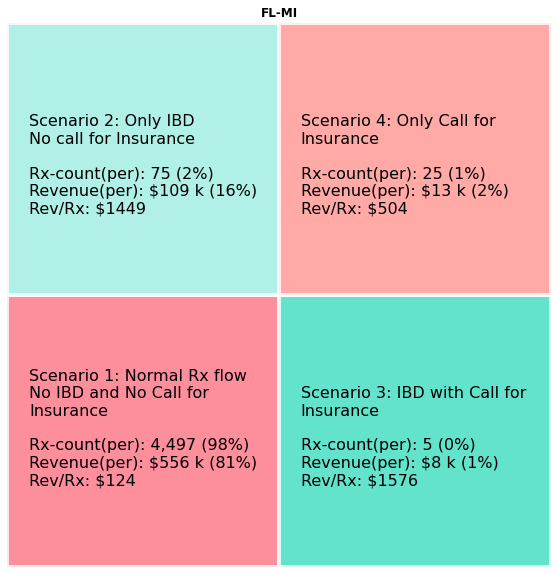

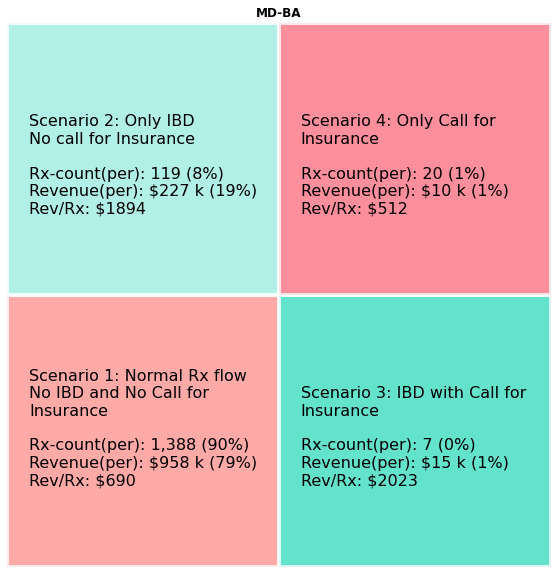

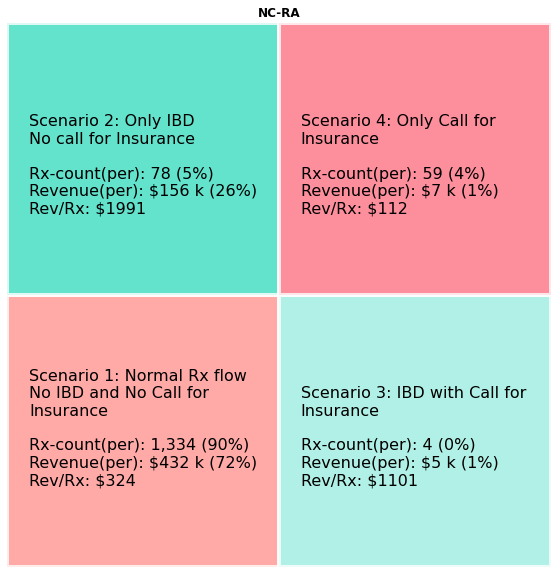

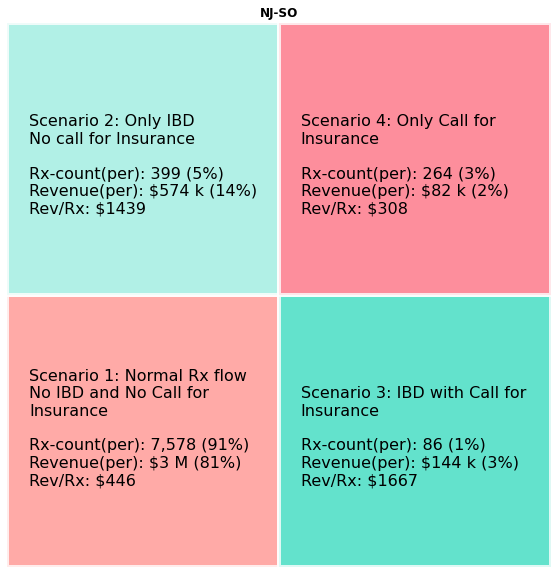

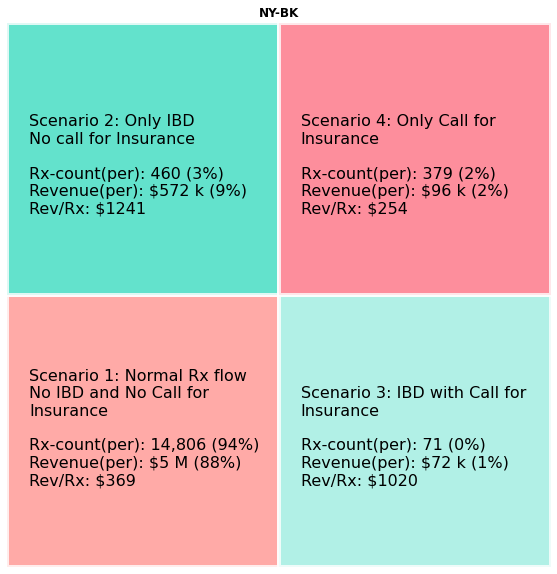

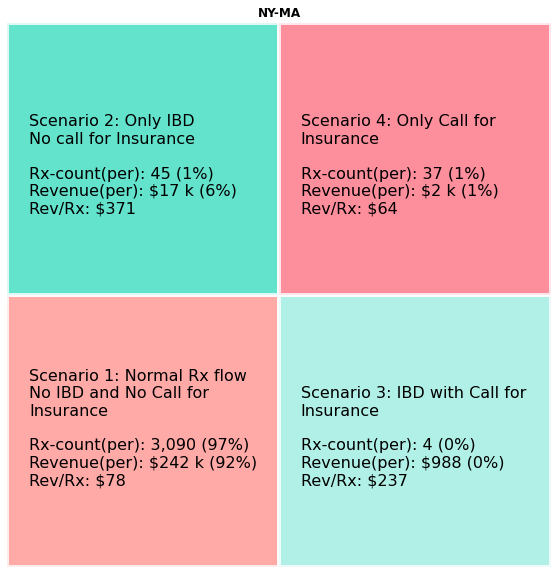

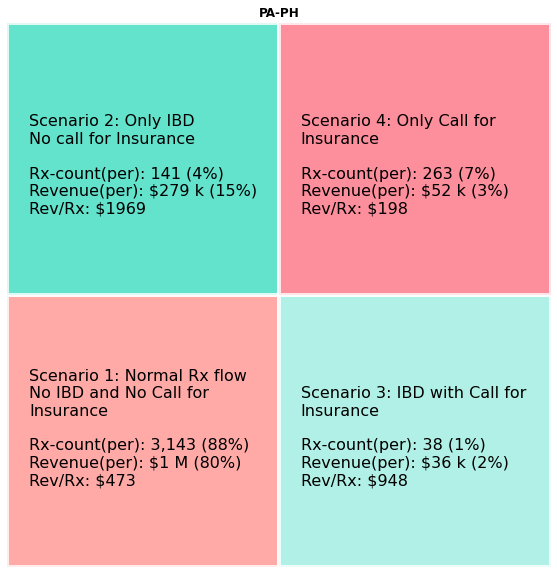

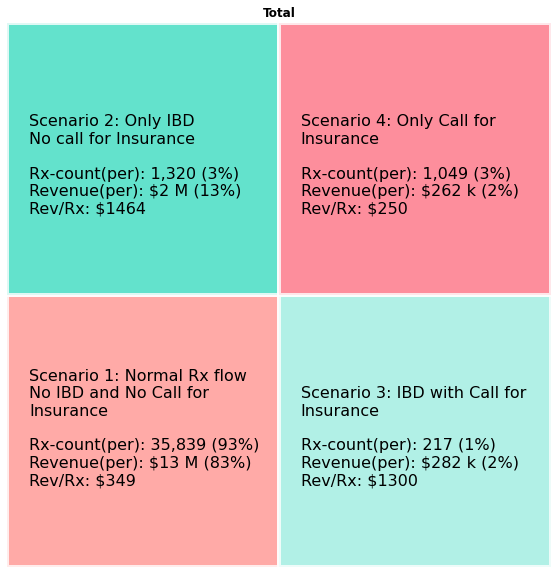

In [40]:
for i in final_df.pharmacy_loc:
    #print(i)
    loc_df = final_df[final_df['pharmacy_loc'] == i]
    for p,k in loc_df.iterrows():
        sizes = [50, 50, 50, 50]
        fig, ax = plt.subplots(figsize=(10,10))
        colors=k[-1:][0]
        #print(colors)
        ax = squarify.plot(
            sizes,
            norm_x=100,
            norm_y=100,
            #label=names,
            #color=k[-4:].values,
             color=colors,
#             print(color)
            alpha=.8,
            edgecolor="white",
            linewidth=4)
        #'{:.0f}%'.format(height)

        a = ax.text(4,15, 'Scenario 1: Normal Rx flow \nNo IBD and No Call for \nInsurance\n\nRx-count(per): '+f'{int(k[1]):,}'+' ('+str(f'{round(k[17]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[2])+' ('+str(f'{round(k[13]*100,2):.0f}')+ '%)'
                            +'\nRev/Rx: $'+str(k[3]),
                            fontsize=16)

        a = ax.text(4, 65, 'Scenario 2: Only IBD \nNo call for Insurance\n\nRx-count(per): '+f'{int(k[4]):,}'+' ('+str(f'{round(k[18]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[5])+' ('+str(f'{round(k[14]*100,2):.0f}')+ '%)'
                            +'\nRev/Rx: $'+str(k[6]),
                            fontsize=16)


        a = ax.text(54, 15, 'Scenario 3: IBD with Call for \nInsurance\n\nRx-count(per): '+f'{int(k[7]):,}'+' ('+str(f'{round(k[19]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[8])+' ('+str(f'{round(k[15]*100,2):.0f}') + '%)'
                            +'\nRev/Rx: $'+str(k[9]),
                            fontsize=16)

        a = ax.text(54, 65, 'Scenario 4: Only Call for \nInsurance\n\nRx-count(per): '+f'{int(k[10]):,}'+' ('+str(f'{round(k[20]*100,2):.0f}')+ '%)'
                            +'\nRevenue(per): $'+str(k[11])+' ('+str(f'{round(k[16]*100,2):.0f}') + '%)'
                            +'\nRev/Rx: $'+str(k[12]),
                            fontsize=16)
        ax.set_aspect('equal')
        plt.title(i,fontsize = font_size_title,fontweight=font_weight ,fontname = font_name,)
        plt.axis('off')
        
        plt.savefig(images_path+i+'.png',bbox_inches = 'tight',pad_inches = 0,dpi=300)
        plt.show()